## Reading SHERPA results

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# Creating a dictionary of dataframes, where each dataframe corresponds to a csv-file.
ls = os.listdir()
other_files = 0
df = {}
for i in range(len(ls)):
    try:
        with open(ls[i]+'/results.csv', 'r') as file:
            df[ls[i]] = pd.read_csv(file)
    except (FileNotFoundError, NotADirectoryError):
        other_files += other_files

df_subset = {}
# Add those which were run only with a subset of the data
ls = os.listdir('with_a_subset_of_the_data')
for i in range(len(ls)):
    try:
        with open(os.path.join('with_a_subset_of_the_data', ls[i], 'results.csv'), 'r') as file:
            df_subset[ls[i]] = pd.read_csv(file)
    except (FileNotFoundError, NotADirectoryError):
        other_files += other_files

In [3]:
# All hyperparameters 
df['2021-05_adadelta_110541'].columns

Index(['Trial-ID', 'Status', 'Iteration', 'activation_1', 'activation_2',
       'activation_3', 'activation_4', 'activation_last', 'bn_1', 'bn_2',
       'bn_3', 'bn_4', 'dropout', 'epsilon', 'l1_reg', 'l2_reg', 'lrinit',
       'model_depth', 'num_units', 'optimizer', 'Objective'],
      dtype='object')

### Plotting the number of model parameters vs the validation loss

In practice I'm working with the best adadelta model mainly since it uses an unbounded output and still performs well.

In [4]:
model_parameters = []
objective = []

for key in df:
    for k in range(df[key].shape[0]):
        d = df[key].at[k, 'model_depth']
        u = df[key].at[k, 'num_units']
        # d-1 is the number of hidden layers, 10*u + 1 is the number of input and output weights & biases
        model_parameters.append(10*u + 1 + (d-2)*(u**2 + u))
        objective.append(df[key].at[k, 'Objective'])

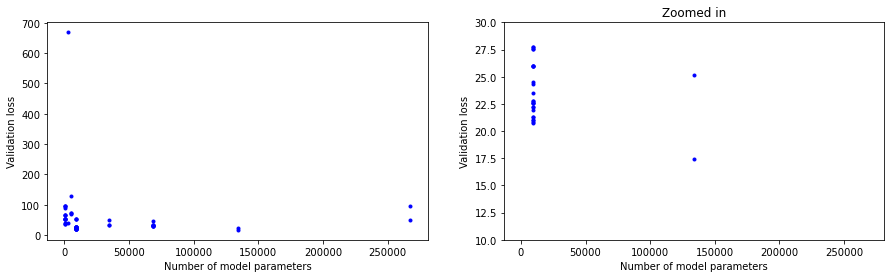

In [5]:
fig = plt.figure()
fig.set_figwidth(15)

ax = fig.add_subplot(1,2,1)
plt.figure(1, figsize = (8,8))
plt.xlabel('Number of model parameters')
plt.ylabel('Validation loss')
plt.plot(model_parameters, objective, 'b.')

ax = fig.add_subplot(1,2,2)
plt.figure(1, figsize = (8,5))
plt.title('Zoomed in')
plt.xlabel('Number of model parameters')
plt.ylabel('Validation loss')
plt.ylim([10,30])
plt.plot(model_parameters, objective, 'b.')

In [6]:
model_parameters = []
objective = []

for key in df_subset:
    for k in range(df_subset[key].shape[0]):
        d = df_subset[key].at[k, 'model_depth']
        u = df_subset[key].at[k, 'num_units']
        # d-1 is the number of hidden layers, 10*u + 1 is the number of input and output weights & biases
        model_parameters.append(10*u + 1 + (d-2)*(u**2 + u))
        objective.append(df_subset[key].at[k, 'Objective'])

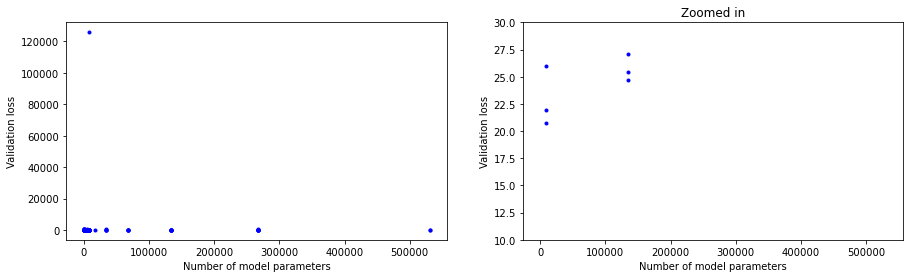

In [7]:
fig = plt.figure()
fig.set_figwidth(15)

ax = fig.add_subplot(1,2,1)
plt.figure(1, figsize = (8,8))
plt.xlabel('Number of model parameters')
plt.ylabel('Validation loss')
plt.plot(model_parameters, objective, 'b.')

ax = fig.add_subplot(1,2,2)
plt.figure(1, figsize = (8,5))
plt.title('Zoomed in')
plt.xlabel('Number of model parameters')
plt.ylabel('Validation loss')
plt.ylim([10,30])
plt.plot(model_parameters, objective, 'b.')

### Best results

In [8]:
# Date and optimizer of the best runs

for j in range(2):
    which_file = 0
    best_index = np.argsort(objective)[j]
    for key in df.keys():
        which_file = which_file + df[key].shape[0]
        if which_file > best_index:
            print(df[key].iloc[df[key].shape[0]+best_index-which_file])
            print('Date and Optimizer: ' + key)
            break
            
for j in range(2):
    which_file = 0
    best_index = np.argsort(objective)[j]
    for key in df_subset.keys():
        which_file = which_file + df_subset[key].shape[0]
        if which_file > best_index:
            print(df_subset[key].iloc[df_subset[key].shape[0]+best_index-which_file])
            print('Date and Optimizer: ' + key)
            break

Trial-ID                                                 1
Status                                           COMPLETED
Iteration                                                2
activation_1                                          tanh
activation_2       <function leaky_relu at 0x2aad925b9f80>
activation_3                                          tanh
activation_4                                           NaN
activation_last                                     linear
bn_1                                                     0
bn_2                                                     0
bn_3                                                     1
bn_4                                                     0
dropout                                                  0
epsilon                                                0.1
l1_reg                                            0.004749
l2_reg                                            0.008732
lrinit                                            0.0004